# Noah Testing File

This is where i will put my personal testing code and stuff

In [1]:
import numpy as np
from scipy import signal
import os
from scipy.stats import kurtosis
from scipy.io import loadmat
#from preprocessing import load_loc
import glob
import pandas as pd

In [2]:
def loadvoltdata_test(brains_volt_path): 
    #column_names = ['aa', 'ap', 'ca', 'de', 'fp', 'ha', 'ja', 'jm', 'jt', 'mv','rn','rr','wc','zt']
    raw_volt_data = []
    raw_stim_data = []
    with os.scandir(brains_volt_path) as entries:
        for entry in entries: #for each brain
            root, extension = os.path.splitext(entry.path) #to avoid any addition hidden files
            if entry.is_file() and extension =='.mat':
                volt_data = loadmat(entry.path)
                raw_volt_data.append(volt_data['data'])
                raw_stim_data.append(volt_data['stim'])
    return raw_volt_data, raw_stim_data

In [ ]:
from preprocessing import preprocess_voltage,loadvoltdata
brains_volt_path = "/Users/noahwanless/Desktop/Spring2026/M467/data_raw"
brains_loc_path = '/Users/noahwanless/Desktop/Spring2026/M467/faces_basic/locs'  
raw_volt,stim = loadvoltdata(brains_volt_path)
filtered_volt = preprocess_voltage(raw_volt)



In [17]:
raw_volt,stim = loadvoltdata(brains_volt_path)


/Users/noahwanless/Desktop/Spring2026/M467/data_raw/aa_faceshouses.mat
/Users/noahwanless/Desktop/Spring2026/M467/data_raw/ap_faceshouses.mat
/Users/noahwanless/Desktop/Spring2026/M467/data_raw/ca_faceshouses.mat
/Users/noahwanless/Desktop/Spring2026/M467/data_raw/de_faceshouses.mat
/Users/noahwanless/Desktop/Spring2026/M467/data_raw/fp_faceshouses.mat
/Users/noahwanless/Desktop/Spring2026/M467/data_raw/ha_faceshouses.mat
/Users/noahwanless/Desktop/Spring2026/M467/data_raw/ja_faceshouses.mat
/Users/noahwanless/Desktop/Spring2026/M467/data_raw/jm_faceshouses.mat
/Users/noahwanless/Desktop/Spring2026/M467/data_raw/jt_faceshouses.mat
/Users/noahwanless/Desktop/Spring2026/M467/data_raw/mv_faceshouses.mat
/Users/noahwanless/Desktop/Spring2026/M467/data_raw/rn_faceshouses.mat
/Users/noahwanless/Desktop/Spring2026/M467/data_raw/rr_faceshouses.mat
/Users/noahwanless/Desktop/Spring2026/M467/data_raw/wc_faceshouses.mat
/Users/noahwanless/Desktop/Spring2026/M467/data_raw/zt_faceshouses.mat


271400


In [4]:
files_nii = glob.glob("/Users/noahwanless/Desktop/Spring2026/M467/faces_basic/brains/*/*.nii")
files_loc = glob.glob("/Users/noahwanless/Desktop/Spring2026/M467/faces_basic/locs/*.mat")
files_loc.sort()
files_nii.sort()

In [5]:
import ants
raw_img_path = '/Users/noahwanless/Desktop/Spring2026/M467/faces_basic/brains/aa/aa_mri.nii'
raw_img_ants = ants.image_read(raw_img_path, reorient='IAL') #takes in the mri image
template_img_ants = ants.image_read(ants.get_ants_data('mni'))

In [6]:
iter = 0
normalized_locs = []
for brain_path,loc_path in zip(files_nii,files_loc): #so for each brain and its locations
    raw_img_ants = ants.image_read(brain_path, reorient='IAL') #open brain image
    electrode_locs = loadmat(loc_path, squeeze_me=True)
    #transforms the brain
    transformation = ants.registration( 
        fixed=template_img_ants,
        moving=raw_img_ants, 
        type_of_transform='SyN',
        verbose=False #make true opens information and stuff
    )
    #change the elctrode location format 
    locs = np.asarray(electrode_locs["locs"], dtype=float).reshape(-1, 3)
    pts = pd.DataFrame(locs, columns=["x", "y", "z"])

    pts_mni_df = ants.apply_transforms_to_points(
        dim=3,
        points=pts,
        transformlist=transformation["fwdtransforms"]
    )
    normalized_locs.append(pts_mni_df)
    del transformation
    print(f"We have normalized brain: {iter}")
    iter +=1
    
    

We have normalized brain: {iter}
We have normalized brain: {iter}
We have normalized brain: {iter}
We have normalized brain: {iter}
We have normalized brain: {iter}
We have normalized brain: {iter}
We have normalized brain: {iter}
We have normalized brain: {iter}
We have normalized brain: {iter}
We have normalized brain: {iter}
We have normalized brain: {iter}
We have normalized brain: {iter}
We have normalized brain: {iter}
We have normalized brain: {iter}


array([[ 3.74848518e+01, -9.29128113e+01,  1.17584133e+01],
       [ 3.90707512e+01, -8.32531891e+01,  7.44413948e+00],
       [ 3.69569931e+01, -7.34788208e+01,  4.67190170e+00],
       [ 3.49248238e+01, -6.26800079e+01,  1.35039139e+00],
       [ 3.35938110e+01, -5.33623352e+01, -2.93756104e+00],
       [ 3.22301598e+01, -4.29464264e+01, -6.09545326e+00],
       [ 3.31348190e+01, -3.21595688e+01, -6.51164436e+00],
       [ 3.58174553e+01, -2.53336601e+01, -2.22969055e-02],
       [ 2.67090149e+01, -5.16943474e+01,  2.28636932e+00],
       [ 3.57440987e+01, -5.22901535e+01, -4.70833015e+00],
       [ 4.48232079e+01, -5.03568268e+01, -8.83594894e+00],
       [ 5.06401329e+01, -4.55265846e+01, -3.66086769e+00],
       [ 2.77253666e+01, -6.38850784e+01,  7.22740269e+00],
       [ 4.06904182e+01, -6.41961517e+01,  2.77462387e+00],
       [ 5.15031242e+01, -6.36112442e+01, -8.85753632e-02],
       [ 6.17586823e+01, -6.22076607e+01,  1.77935982e+00],
       [ 5.59468040e+01, -1.04672852e+02

In [ ]:
def get_normalize_brain_locs(brain_folder,loc_folder):
    files_nii = glob.glob(brain_folder) #gets the folders
    files_loc = glob.glob(loc_folder)
    files_loc.sort() #shorts them so the lists are in the same order
    files_nii.sort()
    template_img_ants = ants.image_read(ants.get_ants_data('mni')) #gets the template image
    iter = 0
    normalized_locs = []
    for brain_path,loc_path in zip(files_nii,files_loc): #so for each brain and its locations
        raw_img_ants = ants.image_read(brain_path, reorient='IAL') #open brain image
        electrode_locs = loadmat(loc_path, squeeze_me=True)
        #transforms the brain
        transformation = ants.registration( 
            fixed=template_img_ants,
            moving=raw_img_ants, 
            type_of_transform='SyN',
            verbose=False #make true opens information and stuff
        )
        #change the elctrode location format 
        locs = np.asarray(electrode_locs["locs"], dtype=float).reshape(-1, 3)
        pts = pd.DataFrame(locs, columns=["x", "y", "z"])

        pts_mni_df = ants.apply_transforms_to_points(
            dim=3,
            points=pts,
            transformlist=transformation["fwdtransforms"]
        )
        normalized_locs.append(pts_mni_df)
        del transformation
        print(f"We have normalized brain: {iter}")
        iter +=1
    return normalized_locs

In [13]:
type(normalized_locs[0])

pandas.DataFrame

array([ 36.765823, -92.69533 ,  10.961902], dtype=float32)

In [38]:
master_loc_list_x = []
master_loc_list_y = []
master_loc_list_z = []
for brain in normalized_locs:
    for point in brain.to_numpy():
        #master_loc_list.append(list(point))
        master_loc_list_x.append(point[0])
        master_loc_list_y.append(point[1])
        master_loc_list_z.append(point[2])

In [ ]:
master_loc_list

[]

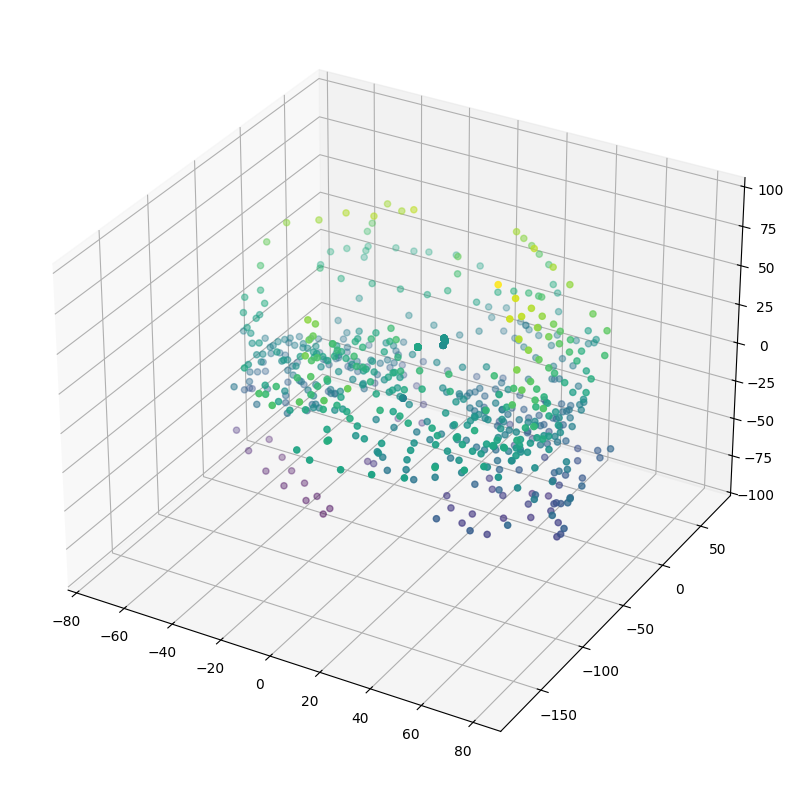

In [42]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(master_loc_list_x,master_loc_list_y,master_loc_list_z,c=master_loc_list_z)

In [32]:
def load_loc(directory_path):
    master_list = []
    with os.scandir(directory_path) as entries:
        for entry in entries:
            if entry.is_file():
                try:
                    print(entry.path)
                    electrodes = loadmat(entry.path)
                    locs = electrodes['locs']
                    temp_loc = []
                    for point in locs:
                        temp_loc.append(point)
                        #master_list.append(point)
                    master_list.append(temp_loc)
                except:
                    print("some other file type was found")
    return master_list

In [ ]:
loc = load_loc(brains_loc_path)



/Users/noahwanless/Desktop/Spring2026/M467/faces_basic/locs/rr_xslocs.mat
/Users/noahwanless/Desktop/Spring2026/M467/faces_basic/locs/.DS_Store
some other file type was found
/Users/noahwanless/Desktop/Spring2026/M467/faces_basic/locs/aa_xslocs.mat
/Users/noahwanless/Desktop/Spring2026/M467/faces_basic/locs/ha_xslocs.mat
/Users/noahwanless/Desktop/Spring2026/M467/faces_basic/locs/jt_xslocs.mat
/Users/noahwanless/Desktop/Spring2026/M467/faces_basic/locs/jm_xslocs.mat
/Users/noahwanless/Desktop/Spring2026/M467/faces_basic/locs/rn_xslocs.mat
/Users/noahwanless/Desktop/Spring2026/M467/faces_basic/locs/zt_xslocs.mat
/Users/noahwanless/Desktop/Spring2026/M467/faces_basic/locs/wc_xslocs.mat
/Users/noahwanless/Desktop/Spring2026/M467/faces_basic/locs/ap_xslocs.mat
/Users/noahwanless/Desktop/Spring2026/M467/faces_basic/locs/mv_xslocs.mat
/Users/noahwanless/Desktop/Spring2026/M467/faces_basic/locs/fp_xslocs.mat
/Users/noahwanless/Desktop/Spring2026/M467/faces_basic/locs/de_xslocs.mat
/Users/noah

In [42]:
fmri_directory_path ='/Users/noahwanless/Desktop/Spring2026/M467/faces_basic/brains'
with os.scandir(fmri_directory_path) as entries:
        for entry in entries: #for each entry in brain
            if os.path.isdir(entry.path):
                for file in entry:
                    root, extension = os.path.splitext(file.path) #to avoid any addition hidden files
                    if file.is_file() and extension =='.nii':
                        print(file.path)

TypeError: 'posix.DirEntry' object is not iterable

In [ ]:
for brain in loc:
    transformation = ants.registration(
    fixed=template_img_ants,
    moving=raw_img_ants, 
    type_of_transform='SyN',
    verbose=True
    )


In [ ]:


#template_img_ants = ants.image_read(template_img_path, reorient='IAL')
transformation = ants.registration(
    fixed=template_img_ants,
    moving=raw_img_ants, 
    type_of_transform='SyN',
    verbose=True
)
#transformation['intransforms']


antsRegistration --dimensionality 3 -r [0x13a81cb08,0x105f5b368,1] --metric mattes[0x13a81cb08,0x105f5b368,1,32,regular,0.2] --transform Affine[0.25] --convergence 2100x1200x1200x0 --smoothing-sigmas 3x2x1x0 --shrink-factors 4x2x2x1 -x [NA,NA] --metric mattes[0x13a81cb08,0x105f5b368,1,32] --transform SyN[0.200000,3.000000,0.000000] --convergence [40x20x0,1e-7,8] --smoothing-sigmas 2x1x0 --shrink-factors 4x2x1 -u 0 -z 1 --output [/var/folders/8t/y5v94x215r973w80szwrht8r0000gq/T/tmp6wztqlcp,0x13a81ee48,0x13a81e148] -x [NA,NA] --float 1 --write-composite-transform 0 -v 1
All_Command_lines_OK
Using single precision for computations.
The composite transform comprises the following transforms (in order): 
  1. Center of mass alignment using fixed image: 0x13a81cb08 and moving image: 0x105f5b368 (type = Euler3DTransform)
  Reading mask(s).
    Registration stage 0
      No fixed mask
      No moving mask
    Registration stage 1
      No fixed mask
      No moving mask
  number of levels = 4


In [5]:
import pandas as pd
loc_path = '/Users/noahwanless/Desktop/Spring2026/M467/faces_basic/locs/aa_xslocs.mat'
m = loadmat(loc_path, squeeze_me=True)
locs = np.asarray(m["locs"], dtype=float).reshape(-1, 3)

pts = pd.DataFrame(locs, columns=["x", "y", "z"])
pts_mni_df = ants.apply_transforms_to_points(
    dim=3,
    points=pts,
    transformlist=transformation["fwdtransforms"]
)

pts_mni_df.head

<bound method NDFrame.head of             x           y          z
0   37.107006  -92.948730  11.158140
1   38.532314  -83.330780   6.915631
2   36.445969  -73.720253   3.909270
3   34.623096  -62.948845   0.154596
4   33.509960  -53.556431  -4.241318
5   32.207867  -43.199184  -7.678377
6   33.026669  -32.723671  -8.328461
7   35.811871  -25.810234  -1.732046
8   26.749477  -51.924488   1.285112
9   35.620419  -52.486229  -6.137724
10  44.547230  -50.622475 -10.645870
11  50.510784  -45.975952  -5.648525
12  27.574966  -64.211899   6.526632
13  40.270023  -64.467224   1.472778
14  50.993038  -63.765705  -1.665596
15  61.561558  -62.465660   0.049381
16  55.372845 -104.790276  12.560316
17  61.817841  -96.763229   9.892846
18  63.933060  -86.155441   8.379528
19  67.735855  -75.823288   9.205905
20  24.406883 -118.865379  22.443333
21  36.179905 -117.041145  19.751795
22  44.513035 -112.576775  16.558207
23  54.365025 -109.449951  15.335282
24  65.625542 -104.559631  17.068539
25  72.3

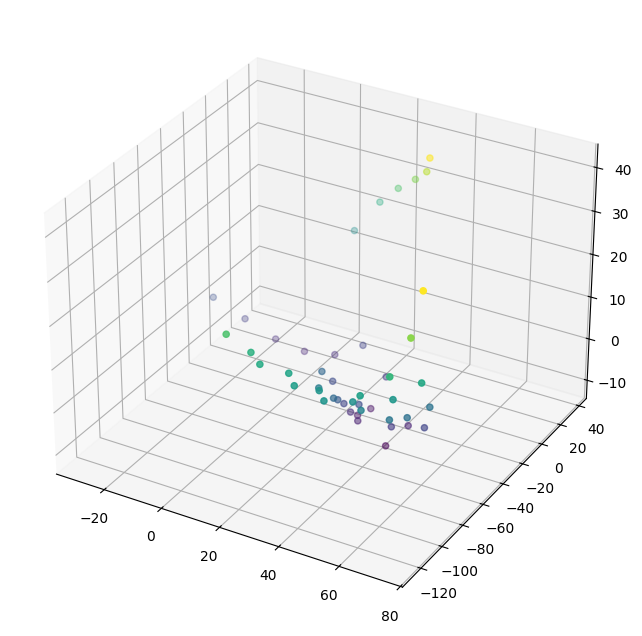

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pts_mni_df['x'], pts_mni_df['y'], pts_mni_df['z'], c=pts_mni_df['z']) #, cmap='viridis'
#pts_mni_df.plot.scatter()

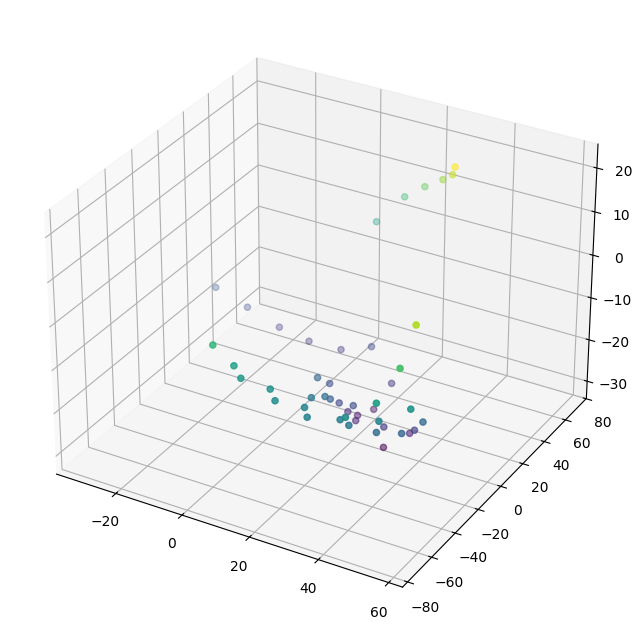

In [11]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pts['x'], pts['y'], pts['z'], c=pts['z']) #, cmap='viridis'